In [8]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [6]:
raw_images = sorted([f for f in os.listdir('vae_outputs') if f.startswith('orig')])
recon_images = sorted([f for f in os.listdir('vae_outputs') if f.startswith('recon')])

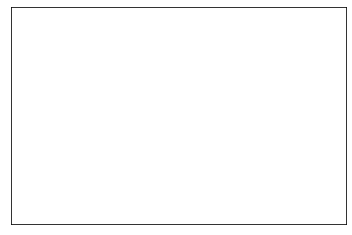

In [13]:
raws = []
recons = []
for i in range(10):
    x_raw = np.array(Image.open('vae_outputs/' + raw_images[i]))
    x_recon = np.array(Image.open('vae_outputs/' + recon_images[i]))
    raws.append(x_raw)
    recons.append(x_recon)

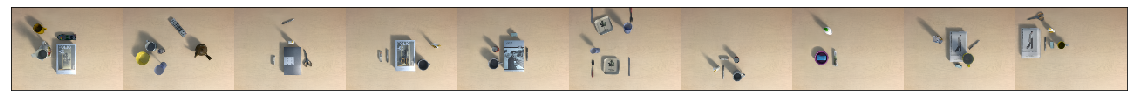

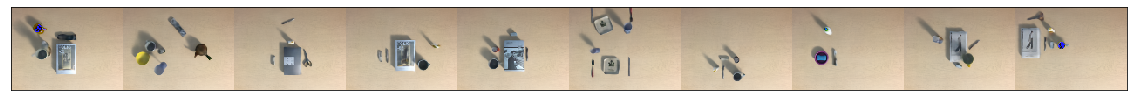

In [29]:
plt.figure(figsize=(20,5))
plt.xticks([])
plt.yticks([])
plt.imshow(np.concatenate(raws, 1))
plt.show()
plt.figure(figsize=(20,5))
plt.xticks([])
plt.yticks([])
plt.imshow(np.concatenate(recons, 1))
plt.show()

In [30]:
Image.fromarray(np.concatenate(raws, 1)).save('test_orig.png')
Image.fromarray(np.concatenate(recons, 1)).save('test_recon.png')

In [31]:
gt_images = sorted([f for f in os.listdir('outputs') if f.startswith('gt')])
raw_images = sorted([f for f in os.listdir('outputs') if f.startswith('orig')])
recon_images = sorted([f for f in os.listdir('outputs') if f.startswith('recon')])

0


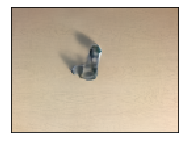

1


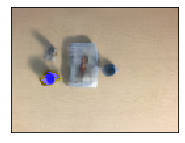

4


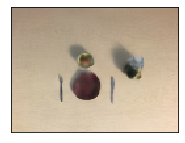

5


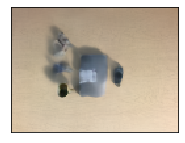

6


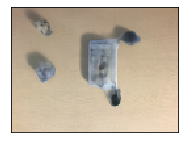

8


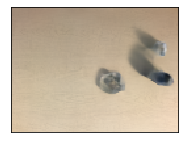

9


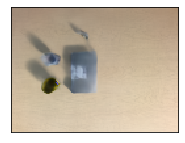

10


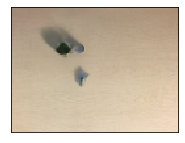

11


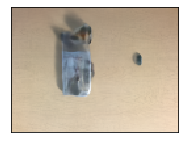

12


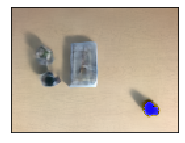

13


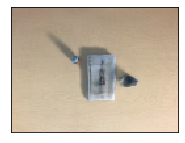

14


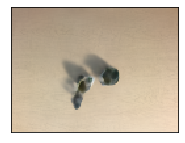

16


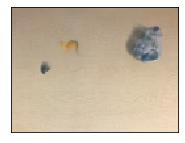

17


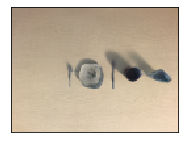

18


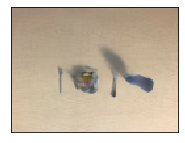

19


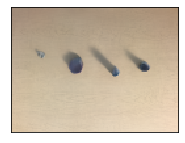

20


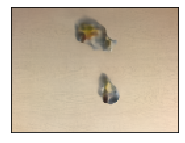

21


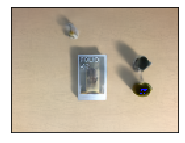

22


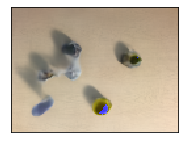

23


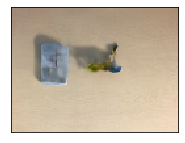

24


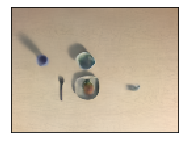

25


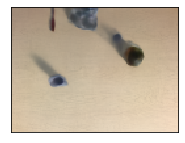

26


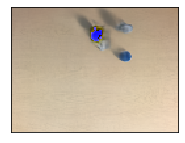

27


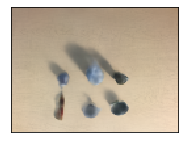

28


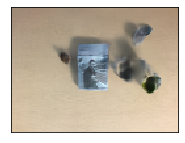

29


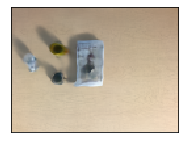

32


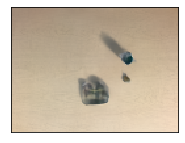

33


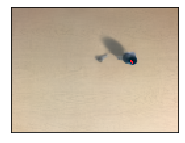

34


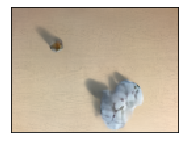

35


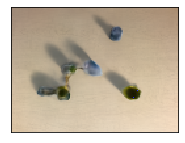

36


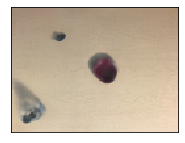

37


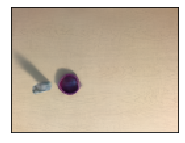

38


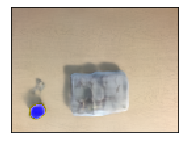

39


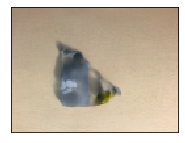

In [38]:
raws = []
recons = []
for i in range(40):
    
    ms = np.load('outputs/ms_%d.npy'%i)
    mt = np.load('outputs/mt_%d.npy'%i)
    if (ms==mt).all():
        continue
    x_raw = np.array(Image.open('outputs/orig_%d.png'%i))
    x_recon = np.array(Image.open('outputs/recon_%d.png'%i))
    raws.append(x_raw)
    recons.append(x_recon)
    
    print(i)
    plt.figure(figsize=(3,5))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_recon)
    plt.show()

In [40]:
ms.shape

(12, 16)

In [41]:
import cv2

In [48]:
from skimage import color

In [55]:
ms_new.shape

(12, 16, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


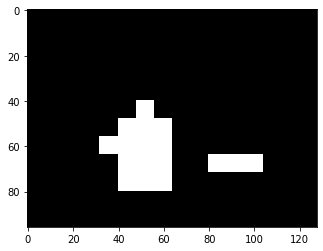

In [60]:
plt.imshow(cv2.resize(ms_new, (128, 96), interpolation=cv2.INTER_NEAREST))

In [69]:
# ms_new = np.repeat(ms[:, :, None], 3, 2)
ms_new = cv2.resize(ms, (128, 96), interpolation=cv2.INTER_NEAREST)
ms_colored = color.label2rgb(ms_new, x_raw, bg_label=0, alpha=0.7, image_alpha=0.0)

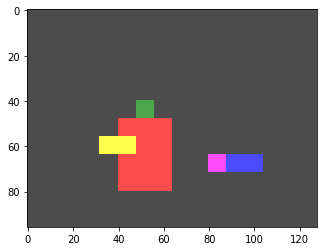

In [77]:
plt.imshow(color.label2rgb(ms_new, x_raw, bg_label=0, alpha=0.7, image_alpha=0.0))

In [64]:
ms_new.shape

(96, 128, 3)

In [63]:
x_raw.shape

(96, 128, 3)

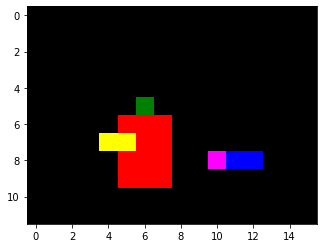

In [54]:
plt.imshow(color.label2rgb(ms, bg_label=0))

1


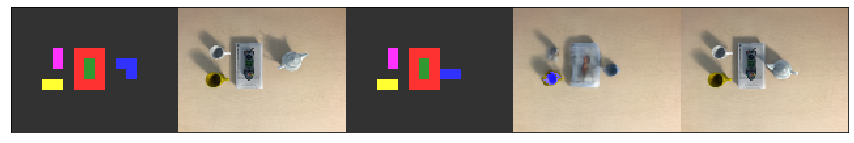

4


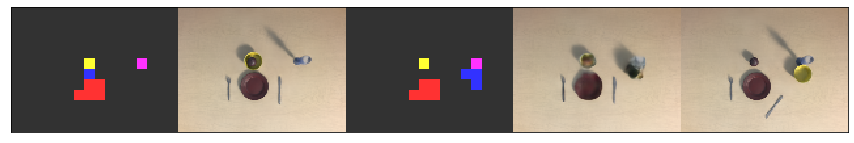

5


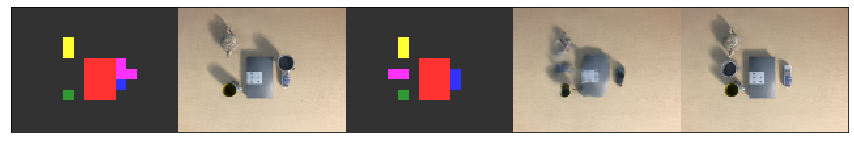

6


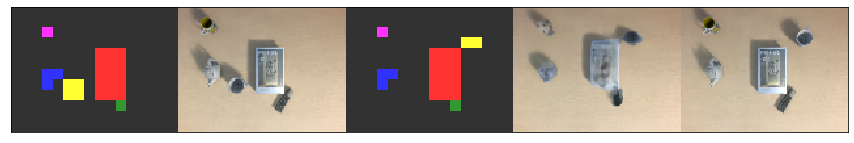

9


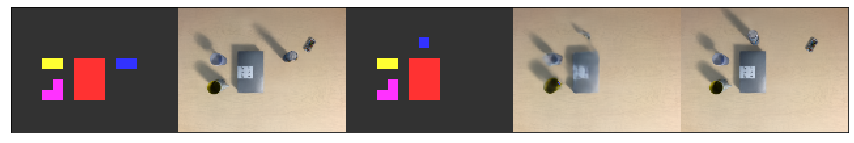

12


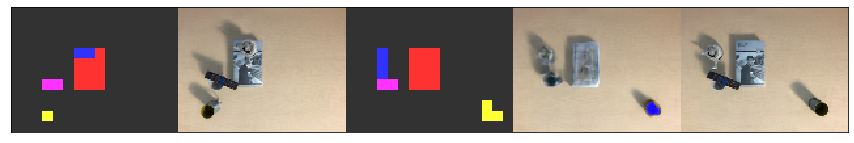

13


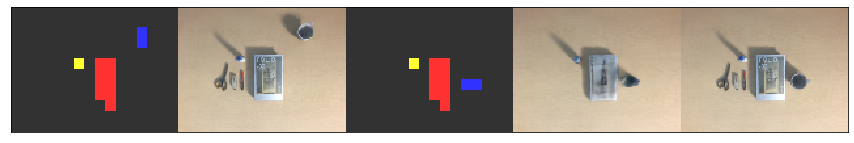

17


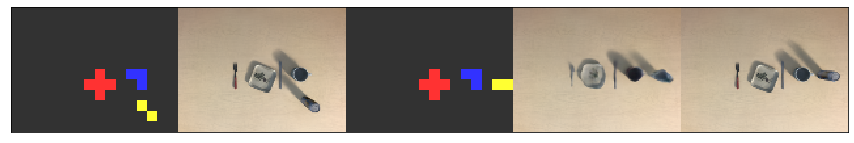

18


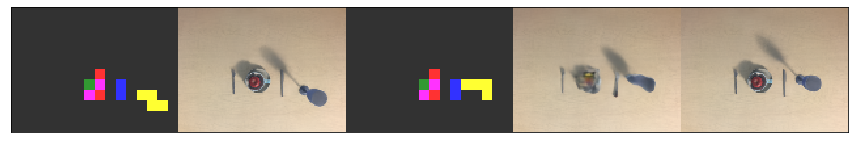

21


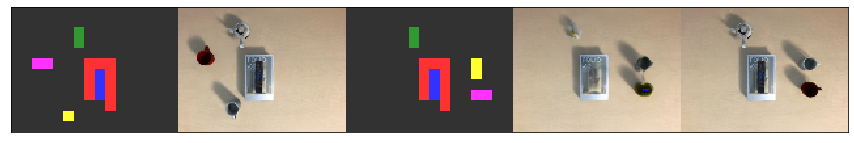

22


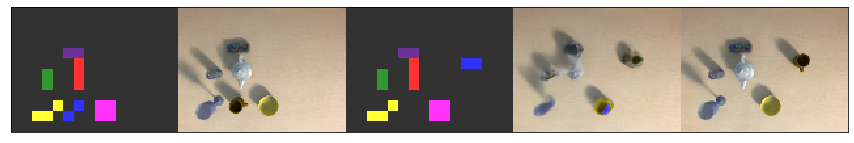

24


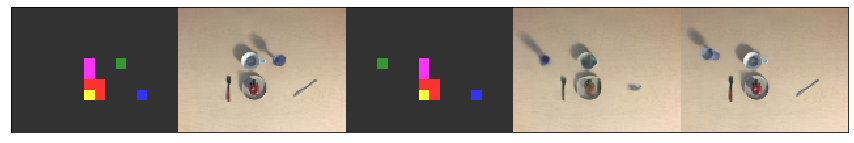

27


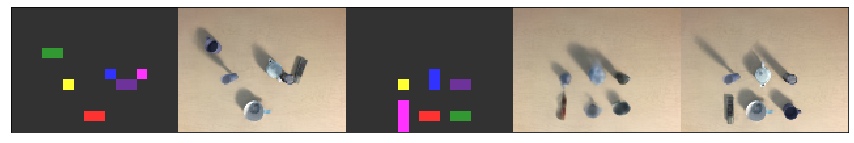

29


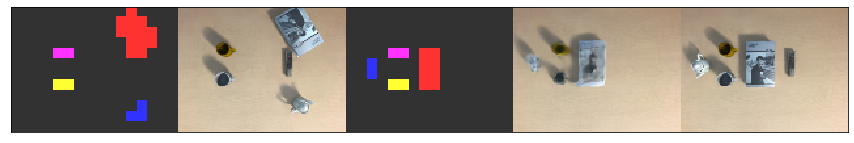

In [86]:
raws = []
recons = []
goods = [1, 4, 5, 6, 9, 12, 13, 17, 18, 21, 22, 24, 27, 29]
bads = [0, 8, 10, 11, 14, 16, 19, 20, 23, 25, 28, 33, 34, 36, 37, 38, 39]
for i in goods:
    ms = np.load('outputs/ms_%d.npy'%i)
    mt = np.load('outputs/mt_%d.npy'%i)
    if (ms==mt).all():
        continue
    x_raw = np.array(Image.open('outputs/orig_%d.png'%i))
    x_recon = np.array(Image.open('outputs/recon_%d.png'%i))
    x_gt = np.array(Image.open('outputs/gt_%d.png'%i))
    raws.append(x_raw)
    recons.append(x_recon)
    
    ms_new = cv2.resize(ms, (128, 96), interpolation=cv2.INTER_NEAREST)
    ms_colored = color.label2rgb(ms_new, x_raw, bg_label=0, alpha=0.8, image_alpha=0.0)
    
    mt_new = cv2.resize(mt, (128, 96), interpolation=cv2.INTER_NEAREST)
    mt_colored = color.label2rgb(mt_new, x_raw, bg_label=0, alpha=0.8, image_alpha=0.0)
    
    print(i)
    plt.figure(figsize=(15, 5))
    plt.xticks([])
    plt.yticks([])
    
    x_final = np.concatenate([ms_colored, x_raw/255, mt_colored, x_recon/255, x_gt/255], 1)
    plt.imshow(x_final)
    plt.show()
    continue

0


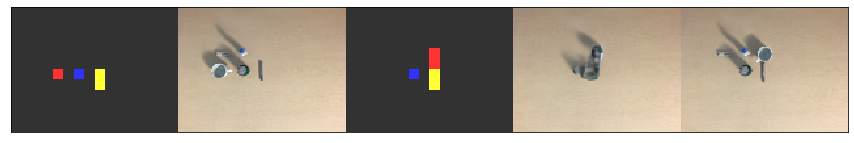

8


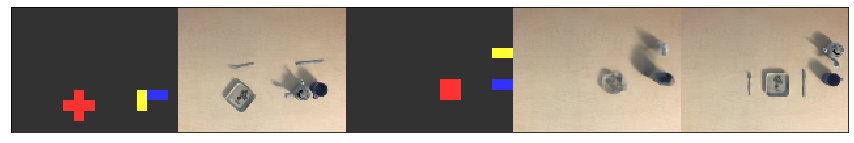

10


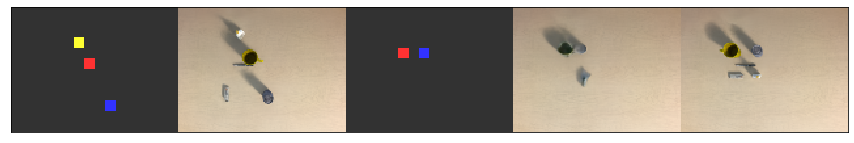

11


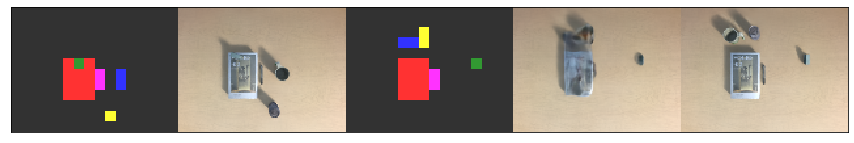

14


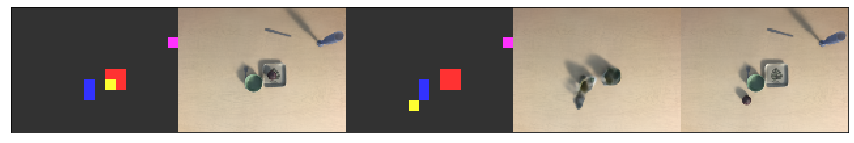

16


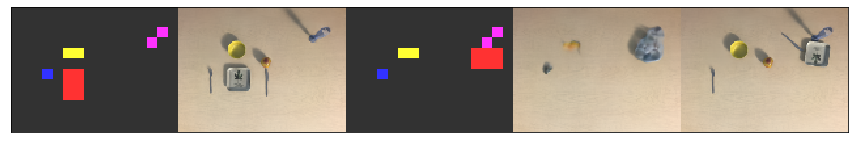

19


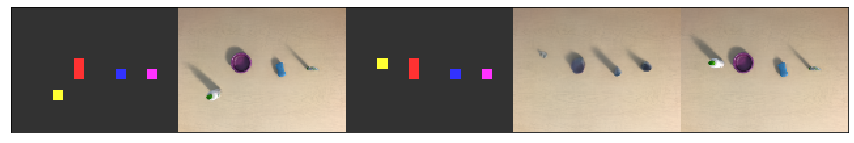

20


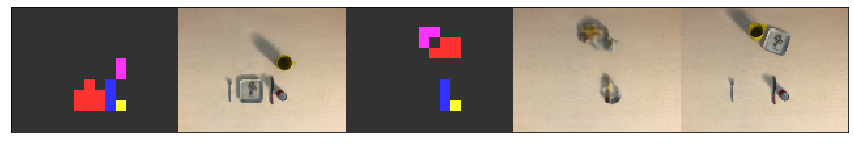

23


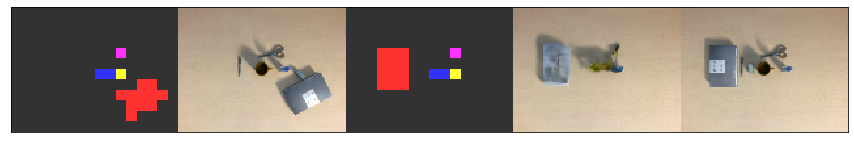

25


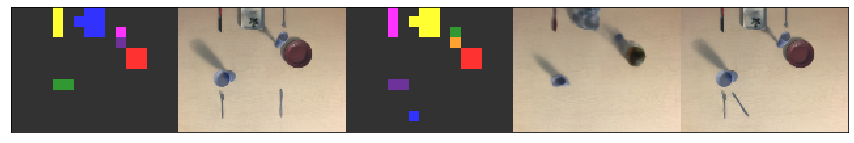

28


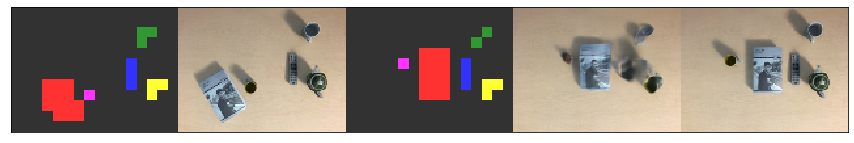

33


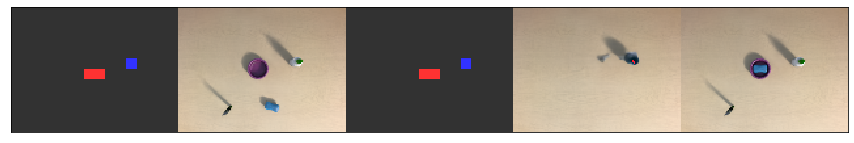

34


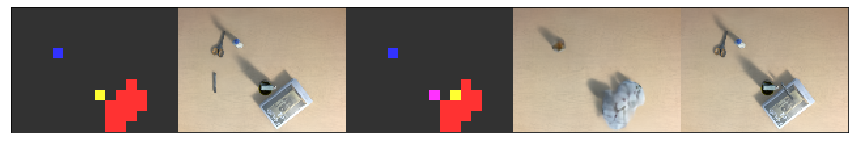

36


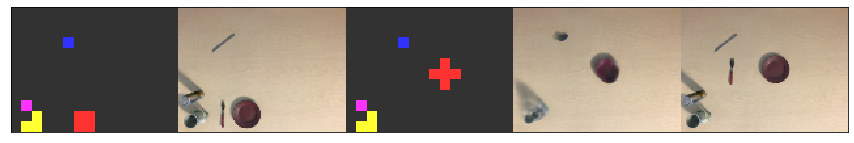

37


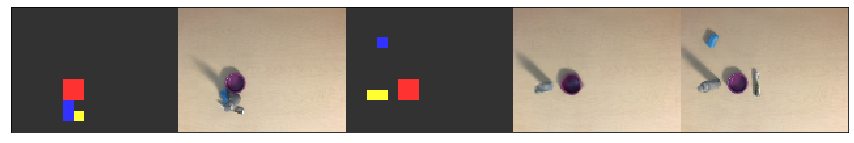

38


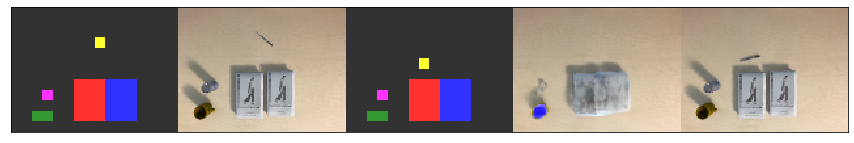

39


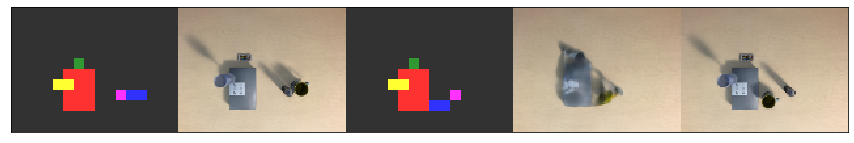

In [87]:
raws = []
recons = []
goods = [1, 4, 5, 6, 9, 12, 13, 17, 18, 21, 22, 24, 27, 29]
bads = [0, 8, 10, 11, 14, 16, 19, 20, 23, 25, 28, 33, 34, 36, 37, 38, 39]
for i in bads:
    ms = np.load('outputs/ms_%d.npy'%i)
    mt = np.load('outputs/mt_%d.npy'%i)
    if (ms==mt).all():
        continue
    x_raw = np.array(Image.open('outputs/orig_%d.png'%i))
    x_recon = np.array(Image.open('outputs/recon_%d.png'%i))
    x_gt = np.array(Image.open('outputs/gt_%d.png'%i))
    raws.append(x_raw)
    recons.append(x_recon)
    
    ms_new = cv2.resize(ms, (128, 96), interpolation=cv2.INTER_NEAREST)
    ms_colored = color.label2rgb(ms_new, x_raw, bg_label=0, alpha=0.8, image_alpha=0.0)
    
    mt_new = cv2.resize(mt, (128, 96), interpolation=cv2.INTER_NEAREST)
    mt_colored = color.label2rgb(mt_new, x_raw, bg_label=0, alpha=0.8, image_alpha=0.0)
    
    print(i)
    plt.figure(figsize=(15, 5))
    plt.xticks([])
    plt.yticks([])
    
    x_final = np.concatenate([ms_colored, x_raw/255, mt_colored, x_recon/255, x_gt/255], 1)
    plt.imshow(x_final)
    plt.show()
    continue

## Finals

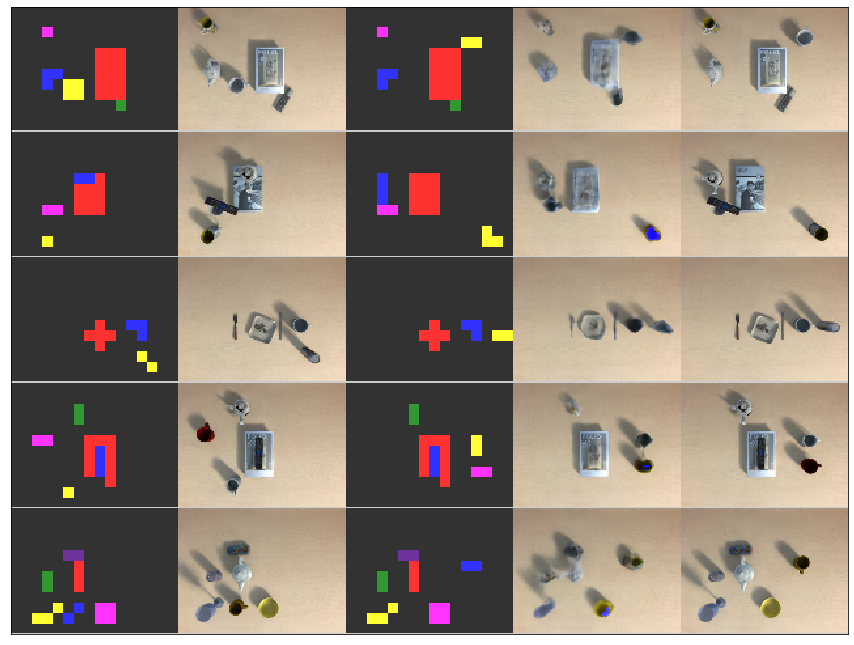

In [106]:
finals = []
for i in [6, 12, 17, 21, 22]:
    ms = np.load('outputs/ms_%d.npy'%i)
    mt = np.load('outputs/mt_%d.npy'%i)
    if (ms==mt).all():
        continue
    x_raw = np.array(Image.open('outputs/orig_%d.png'%i))
    x_recon = np.array(Image.open('outputs/recon_%d.png'%i))
    x_gt = np.array(Image.open('outputs/gt_%d.png'%i))
    
    ms_new = cv2.resize(ms, (128, 96), interpolation=cv2.INTER_NEAREST)
    ms_colored = color.label2rgb(ms_new, x_raw, bg_label=0, alpha=0.8, image_alpha=0.0)
    
    mt_new = cv2.resize(mt, (128, 96), interpolation=cv2.INTER_NEAREST)
    mt_colored = color.label2rgb(mt_new, x_raw, bg_label=0, alpha=0.8, image_alpha=0.0)
    
    x_final = np.concatenate([ms_colored, x_raw/255, mt_colored, x_recon/255, x_gt/255], 1)
    x_final[-1:] = [0.8, 0.8, 0.8]
    finals.append(x_final)

plt.figure(figsize=(15, 25))
plt.xticks([])
plt.yticks([])
plt.imshow(np.concatenate(finals, 0))
plt.show()

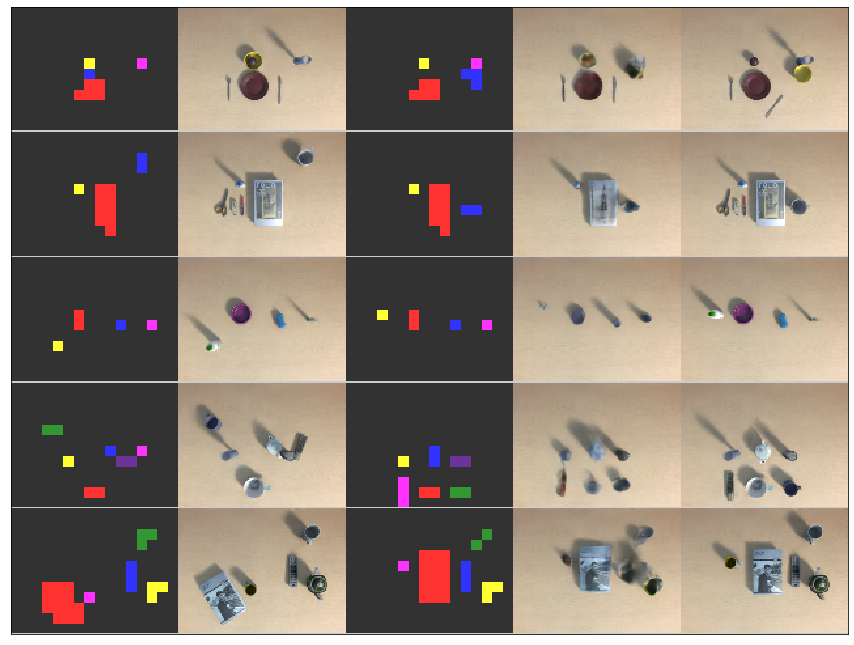

In [107]:
finals = []
for i in [4, 13, 19, 27, 28]:
    ms = np.load('outputs/ms_%d.npy'%i)
    mt = np.load('outputs/mt_%d.npy'%i)
    if (ms==mt).all():
        continue
    x_raw = np.array(Image.open('outputs/orig_%d.png'%i))
    x_recon = np.array(Image.open('outputs/recon_%d.png'%i))
    x_gt = np.array(Image.open('outputs/gt_%d.png'%i))
    
    ms_new = cv2.resize(ms, (128, 96), interpolation=cv2.INTER_NEAREST)
    ms_colored = color.label2rgb(ms_new, x_raw, bg_label=0, alpha=0.8, image_alpha=0.0)
    
    mt_new = cv2.resize(mt, (128, 96), interpolation=cv2.INTER_NEAREST)
    mt_colored = color.label2rgb(mt_new, x_raw, bg_label=0, alpha=0.8, image_alpha=0.0)
    
    x_final = np.concatenate([ms_colored, x_raw/255, mt_colored, x_recon/255, x_gt/255], 1)
    x_final[-1:] = [0.8, 0.8, 0.8]
    finals.append(x_final)

plt.figure(figsize=(15, 25))
plt.xticks([])
plt.yticks([])
plt.imshow(np.concatenate(finals, 0))
plt.show()

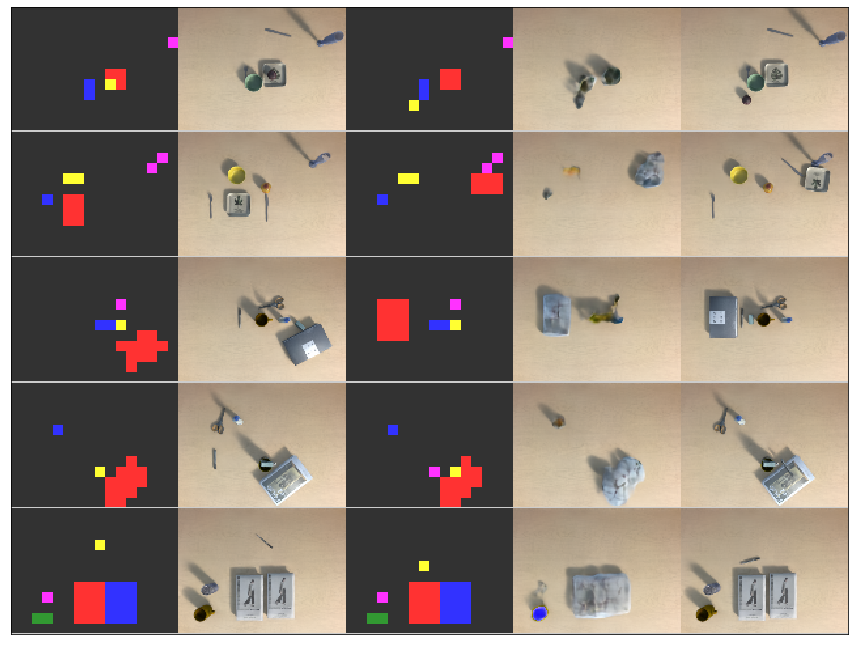

In [108]:
finals = []
for i in [14, 16, 23, 34, 38]:
    ms = np.load('outputs/ms_%d.npy'%i)
    mt = np.load('outputs/mt_%d.npy'%i)
    if (ms==mt).all():
        continue
    x_raw = np.array(Image.open('outputs/orig_%d.png'%i))
    x_recon = np.array(Image.open('outputs/recon_%d.png'%i))
    x_gt = np.array(Image.open('outputs/gt_%d.png'%i))
    
    ms_new = cv2.resize(ms, (128, 96), interpolation=cv2.INTER_NEAREST)
    ms_colored = color.label2rgb(ms_new, x_raw, bg_label=0, alpha=0.8, image_alpha=0.0)
    
    mt_new = cv2.resize(mt, (128, 96), interpolation=cv2.INTER_NEAREST)
    mt_colored = color.label2rgb(mt_new, x_raw, bg_label=0, alpha=0.8, image_alpha=0.0)
    
    x_final = np.concatenate([ms_colored, x_raw/255, mt_colored, x_recon/255, x_gt/255], 1)
    x_final[-1:] = [0.8, 0.8, 0.8]
    finals.append(x_final)

plt.figure(figsize=(15, 25))
plt.xticks([])
plt.yticks([])
plt.imshow(np.concatenate(finals, 0))
plt.show()